In [1]:
import pandas as pd
import statistics as stats
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import files
from google.colab import drive
from scipy.ndimage import measurements

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


1. (10 points) Create a Python script to:

*   Read a data set from a CSV file (e.g., `data.csv`).
*   Compute the mean, median, mode, standard deviation, and variance for the numerical columns.
*   Save the computed statistics to a new CSV file (e.g., `statistics_summary.csv`).


data.csv Link - [Click here](https://github.com/gagan-iitb/DataAnalyticsAndVisualization/blob/main/Lab-W25/data.csv)


In [3]:
def script(dataPath):
  df = pd.read_csv(dataPath)
  values = df[df.columns[0]]
  data = values.tolist()
  mean = stats.mean(data)
  median = stats.median(data)
  mode = stats.mode(data)
  std = stats.stdev(data)
  var = stats.variance(data)
  data = [
      ["Mean","Median","Mode","Standard Deviation","Variance"],
      [mean,median,mode,std,var]
  ]
  with open("statistics_summary.csv","w",newline="") as file:
    writer = csv.writer(file)
    writer.writerows(data)

In [4]:
def main():
  dataPath  = "/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Lab 3/data.csv"
  script(dataPath)

In [5]:
main()

2. (10 points) Given the data set [2.0, 4.5, 4.5, 5.0, 7.0, 8.0, 10.0]:
*   Calculate the mean, median, mode (Traditional Way).
*   Verify your results using Python's `statistics` module.



In [6]:
data = [2.0, 4.5, 4.5, 5.0, 7.0, 8.0, 10.0]

In [7]:
def findMean(data):
  n = len(data)
  if n==0:
    return 0
  sumData = sum(data)
  return sumData/n

In [8]:
def findMedian(data):
  sortedData = sorted(data)
  n = len(sortedData)
  if n==0:
    return None
  mid = n//2
  if n%2==0:
    return (sortedData[mid-1]+sortedData[mid])/2
  else:
    return sortedData[mid]

In [9]:
def findMode(data):
  n = len(data)
  if n==0:
    return None
  frequency = {}
  for value in data:
    if value in frequency:
      frequency[value]=frequency[value]+1
    else:
      frequency[value]=1
  maxFrequency = max(frequency.values(),default=0)
  modes = [value for value,count in frequency.items() if count==maxFrequency]
  if len(modes)==0:
      return None
  elif(len(modes)==1):
      return modes[0]
  else:
    return min(modes)

In [14]:
def verify(mean,median,mode,data):
  mean1 = stats.mean(data)
  median1 = stats.median(data)
  mode1 = stats.mode(data)
  isVerified = {
      "mean":mean==mean1,
      "median":median==median1,
      "mode":mode==mode1
  }
  return isVerified

In [11]:
def verificationFormatter(isVerified):
  for key,value in isVerified.items():
    if value:
      print(f"{key} is verified")
    else:
      print(f"{key} is not verified")

In [12]:
def main():
  mean = findMean(data)
  median = findMedian(data)
  mode = findMode(data)
  print(f"Mean: {mean}")
  print(f"Median: {median}")
  print(f"Mode: {mode}")
  isVerified = verify(mean,median,mode,data)
  verificationFormatter(isVerified)

In [15]:
main()

Mean: 5.857142857142857
Median: 5.0
Mode: 4.5
mean is verified
median is verified
mode is verified


**Numpy Assignment**

**Part 1: Exploring Dimensions and Shapes**
(20 points)

1. Create an array of shape (4, 3, 2) representing a 3D matrix.

2. Print the shape and the number of dimensions (ndim) of the array.

3. Reshape the array into a 2D matrix of shape (12, 2) and verify the new shape and number of dimensions.

4. Create a scalar array with the value 7 and print its shape and dimensions.

In [16]:
def shapeAndDimFinder(data):
  print(f"The shape of the scalar array is: {data.shape}")
  print(f"The dimensions of the scalar array is: {data.ndim}")

In [17]:
def script():
  array = np.empty((4,3,2))
  shapeAndDimFinder(array)
  reshapedArray = array.reshape((12,2))
  shapeAndDimFinder(reshapedArray)
  scalar = np.array(7)
  shapeAndDimFinder(scalar)

In [18]:
def main():
  script()

In [19]:
main()

The shape of the scalar array is: (4, 3, 2)
The dimensions of the scalar array is: 3
The shape of the scalar array is: (12, 2)
The dimensions of the scalar array is: 2
The shape of the scalar array is: ()
The dimensions of the scalar array is: 0


**Part 2: Matrix Manipulations** (15 points)

1. Create a random 4x4 matrix and print its values. Then, find the sum of the elements across both axes (i.e., sum along rows and sum along columns).
2.
Create a 5x5 identity matrix and modify the middle element (at position [2,2]) to 99. Print the modified matrix.

3. Create a 3x3 matrix with random values, then flip the matrix left-right to get the opposite diagonal (anti-diagonal).

In [20]:
def createRandomArray(shape,type):
  if type==1: #1 stands for the identity matrix
    return np.eye(shape[0])
  rng = np.random.default_rng()
  return rng.random(shape)

In [21]:
def printArrayValues(data):
  flattenedData = data.flatten()
  for value in flattenedData:
    print(value)

In [22]:
def findSum(data):
  sumColumns = np.sum(data,axis=0)
  sumRows = np.sum(data,axis=1)
  return (sumRows,sumColumns)

In [23]:
def modifyMiddleElement(data,value):
  index = len(data)//2
  data[index][index] = value
  return data

In [24]:
def flipLeftRight(data):
  return np.fliplr(data)

In [25]:
def script(): #Pipeline
  ##Task 1
  print("____________Task 1___________________")
  matrix = createRandomArray((4,4),0)
  printArrayValues(matrix)
  (sumRows,sumColumns) = findSum(matrix)
  print(f"Sum of the elements across rows: {sumRows}")
  print(f"Sum of the elements across columns: {sumColumns}")
  ##Task 2
  print("____________Task 2___________________")
  identityMatrix = createRandomArray((5,5),1)
  modifiedIdentityMatrix = modifyMiddleElement(identityMatrix,99)
  printArrayValues(modifiedIdentityMatrix)
  ##Task 3
  print("____________Task 3___________________")
  randomMatrix = createRandomArray((3,3),0)
  antiDiagonalMatrix = flipLeftRight(randomMatrix)
  printArrayValues(antiDiagonalMatrix)

In [26]:
def main():
  script()

In [27]:
main()

____________Task 1___________________
0.2160490996466844
0.8978993084202609
0.011034123896250358
0.3913841852413483
0.34771317231973176
0.9924217232972553
0.33276440718250355
0.32800449046392055
0.5658412285374088
0.9379337344704534
0.1616028161417471
0.44957037179033577
0.4470939049760092
0.2376229161756075
0.8251697822478407
0.6003072272191565
Sum of the elements across rows: [1.51636672 2.00090379 2.11494815 2.11019383]
Sum of the elements across columns: [1.57669741 3.06587768 1.33057113 1.76926627]
____________Task 2___________________
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
99.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
____________Task 3___________________
0.5252773534642651
0.8095931178352652
0.5794753647652434
0.5578205816087266
0.39405202636982517
0.007262542230537794
0.13516152205651566
0.32407217984128733
0.8173564098354594


**Data Visualization** (15 points)


In [28]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Generate a random dataset
num_samples = 100

data = {
    "ID": range(1, num_samples + 1),
    "Age": np.random.randint(18, 60, size=num_samples),
    "Height_cm": np.random.normal(165, 10, num_samples).round(1),
    "Weight_kg": np.random.normal(70, 15, num_samples).round(1),
    "City": np.random.choice(["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"], size=num_samples),
    "Grade": np.random.choice(["A", "B", "C", "D", "F"], size=num_samples),
    "Monthly_Income": np.random.randint(2000, 10000, size=num_samples),
    "Hours_Studied": np.random.exponential(5, num_samples).round(1),
    "Passed": np.random.choice(["Yes", "No"], size=num_samples, p=[0.8, 0.2]),
    "Category": np.random.choice(["Category 1", "Category 2", "Category 3"], size=num_samples),
    "Test_Score": np.random.uniform(50, 100, size=num_samples).round(2),

    "Exercise_Hours": np.random.poisson(3, num_samples),
    "Favorite_Color": np.random.choice(["Red", "Blue", "Green", "Yellow", "Purple"], size=num_samples),
}

df = pd.DataFrame(data)

# Save to a CSV for reuse
df.to_csv("random_plotting_dataset.csv", index=False)

# Display the first few rows
print(df.head())

   ID  Age  Height_cm  Weight_kg         City Grade  Monthly_Income  \
0   1   56      163.3       67.8      Chicago     A            3852   
1   2   46      176.6       72.7      Houston     A            6910   
2   3   32      162.5       84.5  Los Angeles     A            7268   
3   4   25      157.3       54.0      Chicago     D            6175   
4   5   38      177.1       71.6      Phoenix     A            4933   

   Hours_Studied Passed    Category  Test_Score  Exercise_Hours Favorite_Color  
0            9.2    Yes  Category 2       64.40               6           Blue  
1            9.1    Yes  Category 1       80.75               2           Blue  
2            3.2    Yes  Category 3       95.59               3           Blue  
3            2.7    Yes  Category 1       56.96               7           Blue  
4            1.6    Yes  Category 1       55.04               0           Blue  


In [29]:
df.head()

,ID,Age,Height_cm,Weight_kg,City,Grade,Monthly_Income,Hours_Studied,Passed,Category,Test_Score,Exercise_Hours,Favorite_Color
0,1,56,163.3,67.8,Chicago,A,3852,9.2,Yes,Category 2,64.40,6,Blue
1,2,46,176.6,72.7,Houston,A,6910,9.1,Yes,Category 1,80.75,2,Blue
2,3,32,162.5,84.5,Los Angeles,A,7268,3.2,Yes,Category 3,95.59,3,Blue
3,4,25,157.3,54.0,Chicago,D,6175,2.7,Yes,Category 1,56.96,7,Blue
4,5,38,177.1,71.6,Phoenix,A,4933,1.6,Yes,Category 1,55.04,0,Blue


**Create a histogram to show the frequency of different age groups.**

In [30]:
def createHistogram(df,column):
  data = df[column].tolist()
  plt.figure(figsize=(10,6))
  plt.hist(data,bins=range(min(data),max(data)+5,5),edgecolor="black")
  plt.title("Frequency of different age groups")
  plt.xlabel("Age")
  plt.ylabel("Frequency")
  plt.grid(True,alpha=0.3)
  plt.xticks(range(min(data), max(data) + 5, 5))
  plt.show()

In [31]:
def script(dataPath):
  df=pd.read_csv(dataPath)
  createHistogram(df,"Age")


In [32]:
def main():
  dataPath = "/content/random_plotting_dataset.csv"
  script(dataPath)

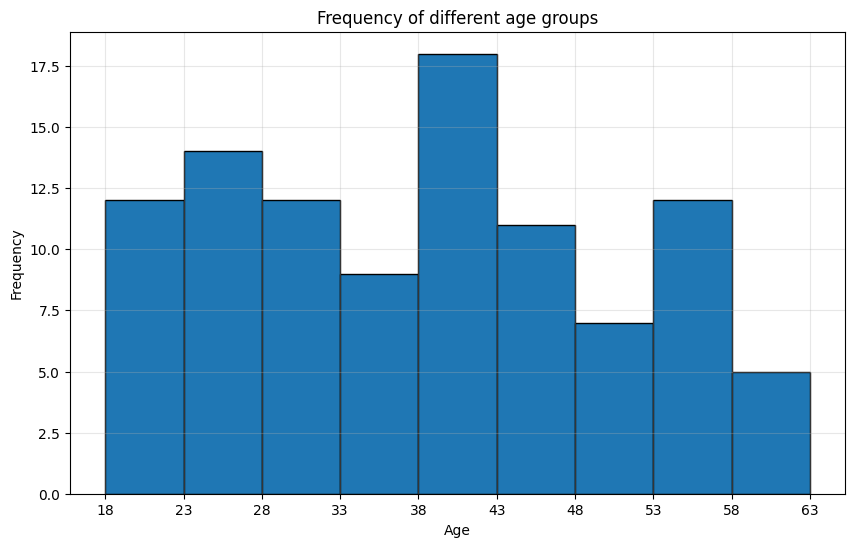

In [33]:
main( )

**Use a bar chart to display the count of entries for each City.**

In [34]:
def countEntries(df,column):
  data = df[column].tolist()
  counts = Counter(data)
  cities = list(counts.keys())
  frequencies = list(counts.values())
  return (cities,frequencies)

In [35]:
def plotBarChart(cities,frequencies):
  plt.figure(figsize=(10,6))
  plt.bar(cities,frequencies,color="skyblue")
  plt.title("Count of entries for each city")
  plt.xlabel("City")
  plt.ylabel("Frequency")
  plt.xticks(rotation=45,ha="right")
  for index,value in enumerate(frequencies):
    plt.text(index,value,str(value),ha="center",va="bottom")
  plt.tight_layout()
  plt.show()

In [36]:
def script(dataPath):
  df = pd.read_csv(dataPath)
  (cities,frequencies) = countEntries(df,"City")
  plotBarChart(cities,frequencies)

In [37]:
def main():
  dataPath = "/content/random_plotting_dataset.csv"
  script(dataPath)

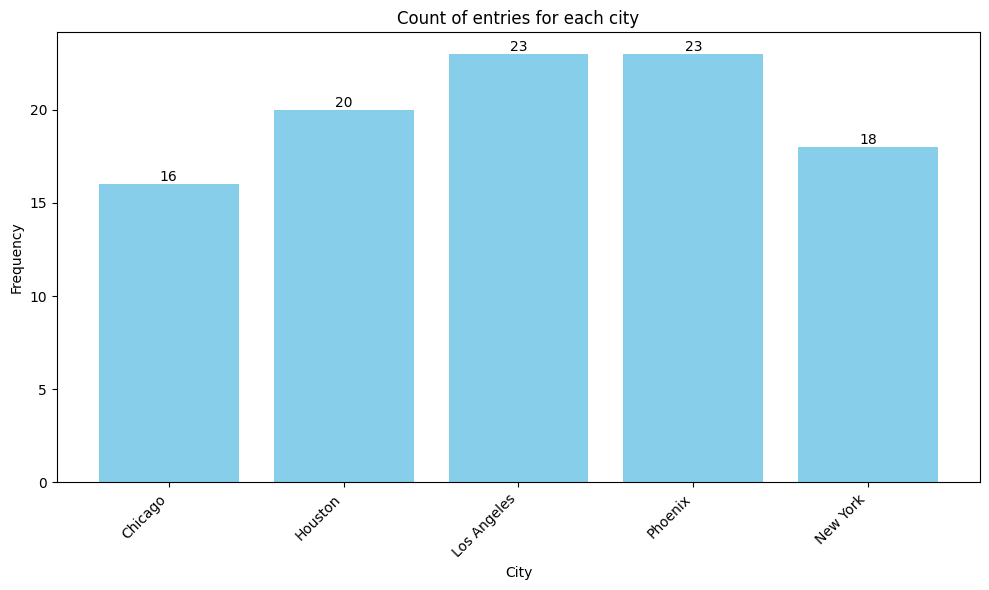

In [38]:
main()

**Create a pie chart to show the proportion of Passed values.**

In [39]:
def counter(df,column):
  data = df[column].tolist()
  counts = Counter(data)
  labels = list(counts.keys())
  frequencies = list(counts.values())
  return (labels,frequencies)

In [40]:
def plotPieChart(labels,frequencies):
  labels = ["Passed" if label=="Yes" else "Failed" for label in labels]
  plt.figure(figsize=(8,8))
  plt.pie(frequencies,labels=labels,autopct="%1.1f%%",colors=["#2ecc71","#e74c3c"])
  plt.title("Distribution of Passed/Failed")
  plt.legend(labels)
  plt.show()

In [41]:
def script(dataPath):
  df = pd.read_csv(dataPath)
  (labels,frequencies) = counter(df,"Passed")
  plotPieChart(labels,frequencies)

In [42]:
def main():
  dataPath = "/content/random_plotting_dataset.csv"
  script(dataPath)

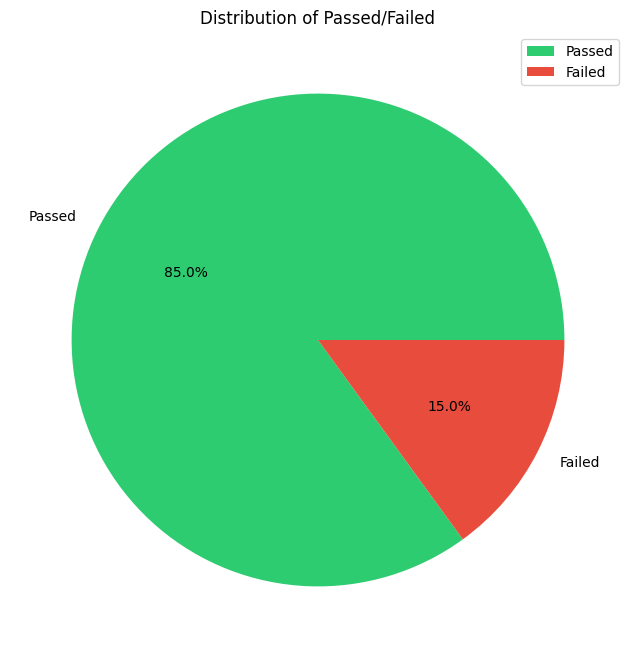

In [43]:
main()

**Matrix Problem:** (40+40 = 80 points)
1. Calculate the rank of a 20x20 binary random matrix, similar to what we did in the activity. But this time, we will go to each cell and generate a 1 with probability "p". Plot the rank as a function of p. Any insights? Any conjectures you can make about random matrices?
2. Now generate a binary random matrix of size 1920 x 1080. Imagine 1s to be land and 0s to be water. Write a program to count the number of islands in your matrix. Study the following: number of islands, size of the largest island and plot them for varying values of "p".

In [44]:
def generateRandomMatrix(shape,p):
  return np.random.choice([0,1],size=shape,p=[1-p,p])

In [45]:
def findRank(shape):
  pValues = np.linspace(0,1,50)
  ranks = []
  for p in pValues:
    matrix = generateRandomMatrix(shape,p)
    rank = np.linalg.matrix_rank(matrix)
    ranks.append(rank)
  return (pValues,ranks)

In [46]:
def rankAnalysis(pValues,ranks,shape):
  plt.figure(figsize=(10,6))
  plt.plot(pValues,ranks,"-o",markersize=3)
  plt.title("Rank vs Probability")
  plt.xlabel("Probability")
  plt.ylabel("Rank")
  plt.grid(True)
  plt.axhline(y=shape[0],color="r",linestyle="--",alpha=0.5,label=f"Maximum Rank ({shape[0]})")
  plt.legend()
  plt.show()

In [47]:
def script(shape):
  pValues,ranks = findRank(shape)
  rankAnalysis(pValues,ranks,shape)

In [48]:
def main():
  shape = (20,20)
  script(shape)

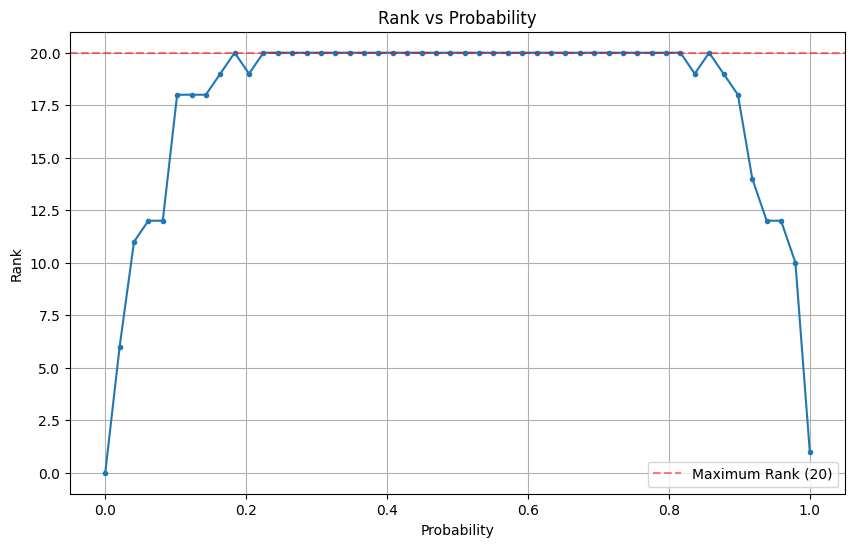

In [49]:
main()

In [50]:
def numAndSizeFinder(matrix):
  labelledArray,numFeatures = measurements.label(matrix)
  if numFeatures>0:
    islandSizes = measurements.sum(matrix,labelledArray,index=range(1,numFeatures+1))
    maxSize = np.max(islandSizes)
  else:
    maxSize = 0
  return numFeatures,maxSize

In [51]:
def analysis(shape):
  rows = shape[0]
  cols = shape[1]
  pValues = np.linspace(0.1,0.9,9)
  results = []
  for p in pValues:
    matrix = generateRandomMatrix((rows,cols),p)
    numIslands,maxSize = numAndSizeFinder(matrix)
    results.append({
        'p':p,
        "numIslands":numIslands,
        "maxSize":maxSize
    })
  return results

In [52]:
def configurations(results):
  pValues = [r["p"] for r in results]
  numIslands = [r["numIslands"] for r in results]
  maxSize = [r["maxSize"] for r in results]
  fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,12))
  return (pValues,numIslands,maxSize,ax1,ax2)


In [53]:
def plotNumberOfIslands(ax1,pValues,numIslands,):
  ax1.plot(pValues,numIslands,"-o",color="blue")
  ax1.set_title("Number of Islands vs Probability")
  ax1.set_xlabel("Probability")
  ax1.set_ylabel("Number of Islands")
  ax1.grid(True)


In [54]:
def plotMaxSize(ax2,pValues,maxSize):
  ax2.plot(pValues,maxSize,"-o",color="green")
  ax2.set_title("Maximum Island Size vs Probability")
  ax2.set_xlabel("Probability")
  ax2.set_ylabel("Maximum Island Size")
  ax2.grid(True)

In [55]:
def plot():
  plt.tight_layout()
  plt.show()

In [56]:
def script(shape):
  results = analysis(shape)
  pValues,numIslands,maxSize,ax1,ax2= configurations(results)
  plotNumberOfIslands(ax1,pValues,numIslands)
  plotMaxSize(ax2,pValues,maxSize)
  plot()

In [57]:
def main():
  shape = (1920,1080)
  script(shape)

<ipython-input-50-54c7f0fdc8aa>:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labelledArray,numFeatures = measurements.label(matrix)
<ipython-input-50-54c7f0fdc8aa>:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  islandSizes = measurements.sum(matrix,labelledArray,index=range(1,numFeatures+1))


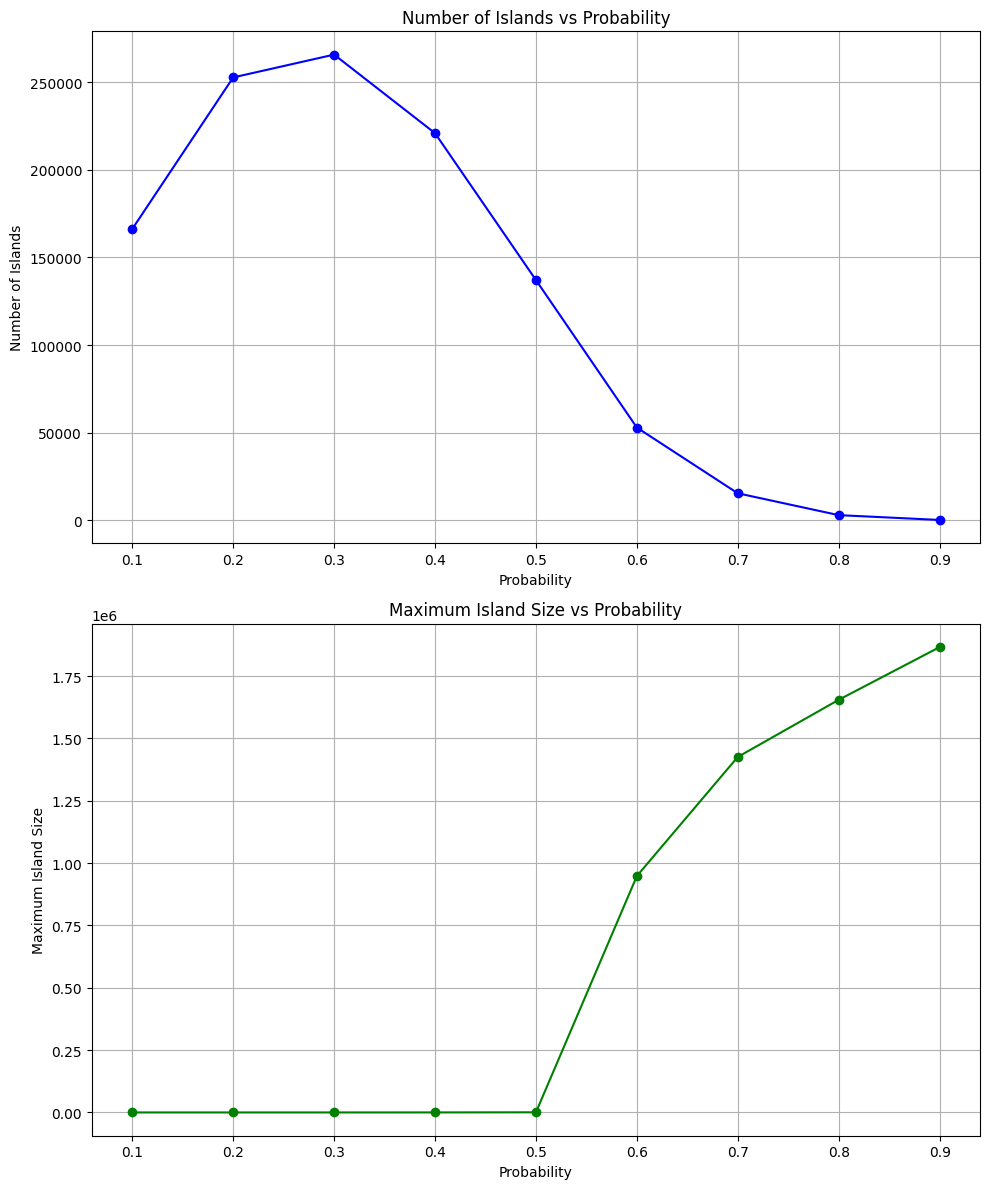

In [58]:
main()